In [1]:
import numpy as np
import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write     # Imported libaries such as numpy, scipy(read, write), matplotlib.pyplot
from scipy import signal
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')




In [2]:
(Frequency, array) = read('newpro.wav')
len(array) 

/Applications/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


160642

Text(0, 0.5, 'Amplitude')

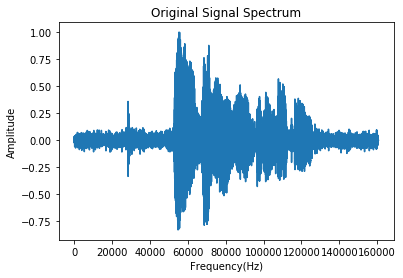

In [3]:
plt.plot(array) 
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')


In [4]:
FourierTransformation = sp.fft(array) # Calculating the fourier transformation of the signal

In [5]:
scale = sp.linspace(0, Frequency, len(array))

<StemContainer object of 3 artists>

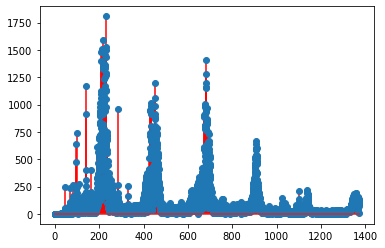

In [6]:
plt.stem(scale[0:5000],  np.abs(FourierTransformation[0:5000]), 'r', use_line_collection=True)  # The size of our diagram


Text(0.5, 1.0, 'Signal spectrum after FFT')

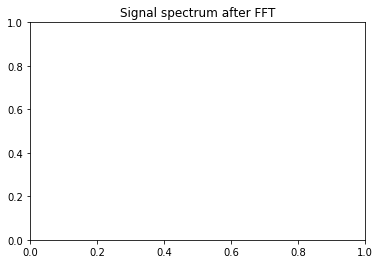

In [7]:
plt.title('Signal spectrum after FFT')


Text(0.5, 0, 'Frequency(Hz)')

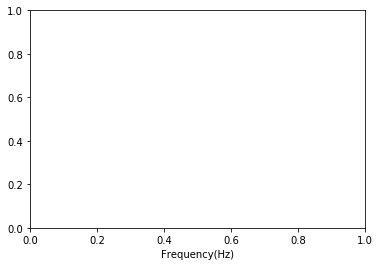

In [8]:
plt.xlabel('Frequency(Hz)')


Text(0, 0.5, 'Amplitude')

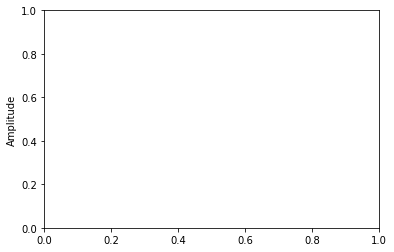

In [9]:
plt.ylabel('Amplitude')

In [10]:
GuassianNoise = np.random.rand(len(FourierTransformation)) # Adding guassian Noise to the signal.

In [11]:
NewSound = GuassianNoise + array

In [12]:
write("v1.wav", Frequency, NewSound) # Saving it to the file.

In [13]:
b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass') # ButterWorth filter 4350

Text(0, 0.5, 'Amplitude')

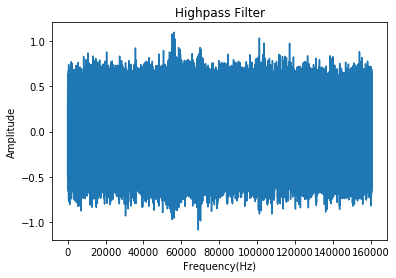

In [14]:
filteredSignal = signal.lfilter(b,a,NewSound)
plt.plot(filteredSignal) # plotting the signal.
plt.title('Highpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

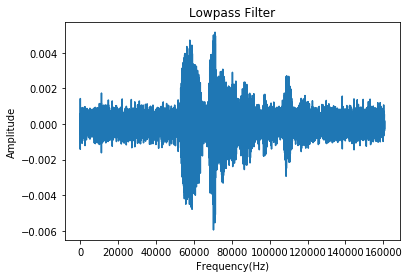

In [15]:
c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [16]:
write("v2.wav", Frequency, newFilteredSignal) # Saving it to the file.